**Problem 1**: Application of Keras to biuld, compile, and train a neural network to perform XOR operation:


1.   Create an np array of shape 4x2 for the inputs and another 4x1 array for the labels of 
XOR.
2.   Plot the given data points with two different markers for each group. 
3. Based on the plot from part (b), what is the minimum number of layers and nodes that 
is required to classify the training data points correctly? Explain. 
4. Build the network that you proposed in part c using the Keras library. 
5. Compile the network. Make sure to select a correct loss function for this classification 
problem. Use stochastic gradient descent learning (SGD, learning rate of 0.1). 
Explain your selection of the loss function.  
6. Train the network for 200 epochs and a batch size of 1.
7. Use the trained weights and plot the final classifier lines in the plot of part (b). 
8. Plot the training loss (i.e., the learning curve) for all the epochs. 
9. Repeat steps (d) to (g) after adding 2 more nodes to the first layer and training for 400 
epochs.  
10. What behavior do you observe from the classifier lines after adding more nodes? 
Which number of nodes is more suitable in this problem? Explain.   




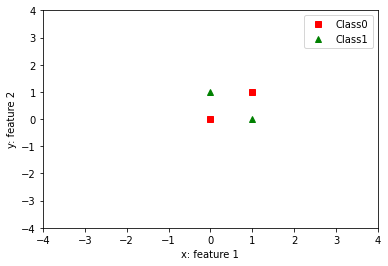

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Part a and b

def plot_fun(features, labels, classes):
    plt.plot(features[labels[:] == classes[0],0], features[labels[:] == classes[0],1], 'rs', features[labels[:] == classes[1], 0], features[labels[:] == classes[1], 1], 'g^')
    plt.axis([-4, 4, -4, 4])
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
    plt.show()

def plot_fun_thr(features, labels, thre_parms, classes):
  #plotting the data points
  plt.plot(features[labels[:]==classes[0], 0], features[labels[:]==classes[0], 1], 'rs', features[labels[:]==classes[1],0], features[labels[:]==classes[1], 1], 'g^', markersize=15)
  x1 = np.linspace(-2, 2, 50)
  x2 = -(thre_parms[0]*x1+thre_parms[2])/thre_parms[1]
  plt.plot(x1, x2, '-r')
  plt.xlabel('x: features 1')
  plt.ylabel('y: features 2')
  plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])


def plot_curve(accuracy_train, loss_train):
  epochs = np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs, accuracy_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')
  plt.subplot(1,2,2)
  plt.plot(epochs, loss_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary crossentropy loss')
  plt.title('Training Loss')
  plt.show()

features = np.array([[0, 0],[0,1], [1,0], [1,1]])
labels = np.array([0, 1, 1, 0])
classes = [0, 1]

plot_fun(features, labels, classes)

Part C: The Minimum number of layers are are 2, 1 hidden layer with two nodes and 1 output layer with one node. The hidden layer needs two nodes for each line, and the output layer needs one layer to make a decision based on the data from the two lines in the hidden layer.

In [7]:
# part d

# defining the model
model_a = Sequential()
model_a.add(Dense(input_dim = 2, units = 2, activation = 'tanh'))
model_a.add(Dense(units = 1, activation = 'sigmoid'))
model_a.summary()

# part e

# compiling the model
opt = tf.keras.optimizers.SGD(learning_rate = 0.1)
model_a.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 2)                 6         
                                                                 
 dense_22 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


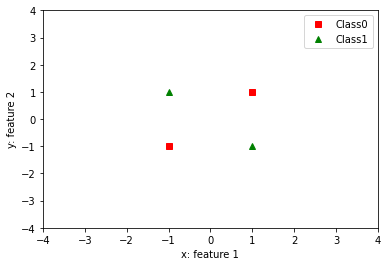

Epoch 1/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7690 - accuracy: 0.5000
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7562 - accuracy: 0.5000
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7452 - accuracy: 0.5000
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7349 - accuracy: 0.5000
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7253 - accuracy: 0.5000
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7169 - accuracy: 0.5000
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5000
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5000
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.7500
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.7500
Epoch 11/200
4/4 [===========

In [8]:
# part f

# normalization
features = (features - np.mean(features, axis = 0)) / np.std(features, axis = 0) # normalization
plot_fun(features, labels, classes)

#train the network for 200 epochs and a batch size of 1
history = model_a.fit(features, labels, batch_size = 1, epochs = 200, verbose = 1)



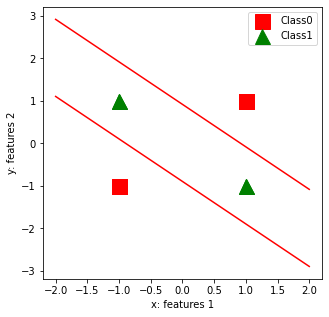

In [9]:
# part g

# Use the trained weights and plot the final classifier lines in the plot of part (b)
weights = model_a.layers[0].get_weights()
plt.figure(figsize=[5,5])
for node_i in range(weights[0].shape[1]):
  thre_parms = np.array(weights[0][:, node_i]) #This first item is the weights for the inputs
  thre_parms = np.append(thre_parms, weights[1][node_i]) #second item the weights for the bias
  plot_fun_thr(features, labels, thre_parms, classes)

plt.show()

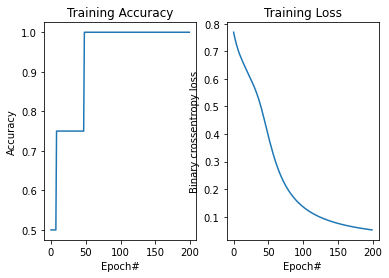

In [10]:
# part h

#plot the training loss
acc_curve = np.array(history.history['accuracy'])
loss_curve = np.array(history.history['loss'])
plot_curve(acc_curve, loss_curve)

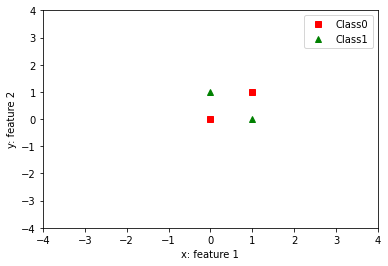

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 4)                 12        
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


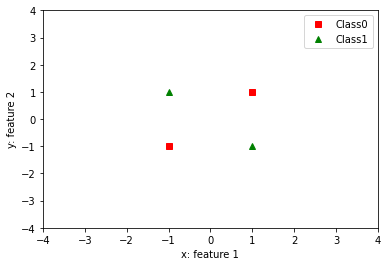

Epoch 1/400
4/4 [==============================] - 0s 3ms/step - loss: 0.8352 - accuracy: 0.5000
Epoch 2/400
4/4 [==============================] - 0s 3ms/step - loss: 0.7911 - accuracy: 0.5000
Epoch 3/400
4/4 [==============================] - 0s 4ms/step - loss: 0.7588 - accuracy: 0.7500
Epoch 4/400
4/4 [==============================] - 0s 3ms/step - loss: 0.7365 - accuracy: 0.5000
Epoch 5/400
4/4 [==============================] - 0s 4ms/step - loss: 0.7143 - accuracy: 0.7500
Epoch 6/400
4/4 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.7500
Epoch 7/400
4/4 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.7500
Epoch 8/400
4/4 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.7500
Epoch 9/400
4/4 [==============================] - 0s 3ms/step - loss: 0.6373 - accuracy: 0.7500
Epoch 10/400
4/4 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.7500
Epoch 11/400
4/4 [===========

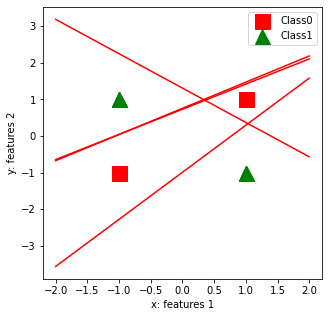

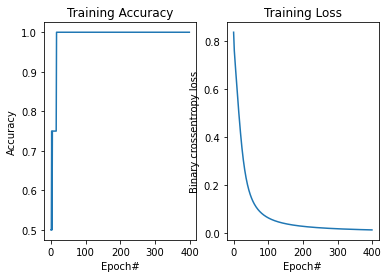

In [11]:
# part i

features = np.array([[0, 0],[0,1], [1,0], [1,1]])
labels = np.array([0, 1, 1, 0])
classes = [0, 1]

plot_fun(features, labels, classes)

# defining the model
model_b = Sequential()
model_b.add(Dense(input_dim = 2, units = 4, activation = 'tanh'))
model_b.add(Dense(units = 1, activation = 'sigmoid'))
model_b.summary()

# compiling the model
opt = tf.keras.optimizers.SGD(learning_rate = 0.1)
model_b.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

# normalization
features = (features - np.mean(features, axis = 0)) / np.std(features, axis = 0) # normalization
plot_fun(features, labels, classes)

#train the network for 200 epochs and a batch size of 1
history = model_b.fit(features, labels, batch_size = 1, epochs = 400, verbose = 1)

# Use the trained weights and plot the final classifier lines in the plot of part (b)
weights = model_b.layers[0].get_weights()
plt.figure(figsize=[5,5])
for node_i in range(weights[0].shape[1]):
  thre_parms = np.array(weights[0][:, node_i]) #This first item is the weights for the inputs
  thre_parms = np.append(thre_parms, weights[1][node_i]) #second item the weights for the bias
  plot_fun_thr(features, labels, thre_parms, classes)

plt.show()

#plot the training loss
acc_curve = np.array(history.history['accuracy'])
loss_curve = np.array(history.history['loss'])
plot_curve(acc_curve, loss_curve)

With 4 nodes we can more consistently reach 100% accuracy, with 2 nodes it is very much possible but only gets to 100% accuracy half the time. So if we were trying to use least amount of nodes I would go with two nodes and change the learning rate and keep trying until it randomly learns accurately. But ultimately for efficiency and reliability it would be way more advantageous to use 4 nodes for the hidden layer.

Problem 2: Application of keras to build, compile, and train a nerual network as a three-class classifier for MNIST dataset (0 vs 1 vs 2):


1.   Use mnist function in keras.datasets to load MNIST dataset and split it into training 
and testing sets. Then, randomly select 20% of the training images along with their 
corresponding labels to be the validation data. 
2.   Feature extraction: average the pixel values in the quadrants in each image to 
generate a feature vector of 4 values for each image.
3. Convert the label vectors for all the sets to binary class matrices using 
to_categorical() Keras function.
4. Build, compile, train, and then evaluate: 

  *   Build a neural network with 1 layer that contains 10 nodes using the Keras 
library. 
  *   Compile the network. Make sure to select a correct loss function for this 
classification problem. Use stochastic gradient descent learning (SGD, 
learning rate of 0.0001). Explain your selection of the loss function. 
  *  Train the network for 50 epochs and a batch size of 16. 
  *  Plot the training loss (i.e., the learning curve) for all the epochs. 
  *  Use the evaluate() Keras function to find the training and validation loss and 
accuracy. 

5.  Repeat step (d) for each of the following networks: 

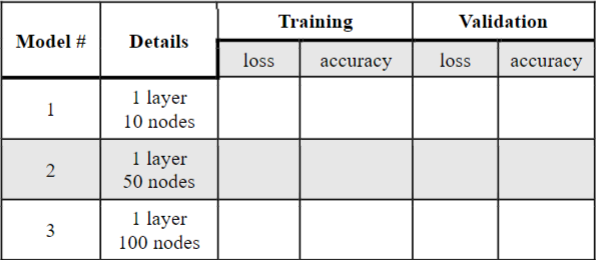
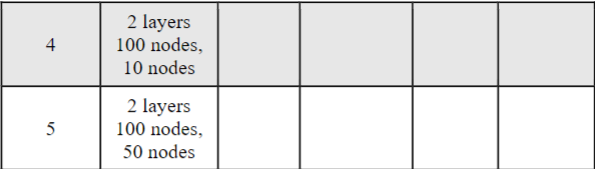
6.  What behavior do you observe in the training loss and the validation loss when you 
increase the number layers and nodes in the previous table. Which model is more 
suitable in this problem? Explain.  
7.  Evaluate the selected model in part (e) on the testing set and report the testing loss 
and accuracy. 





11501568/11490434 [==============================] - 0s 0us/step
Samples of the training images


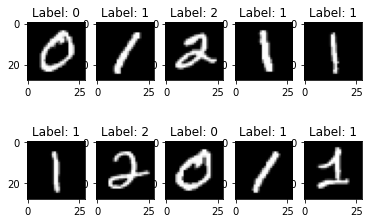

Samples of the testing images


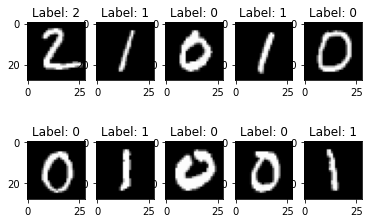

Samples of the validation images


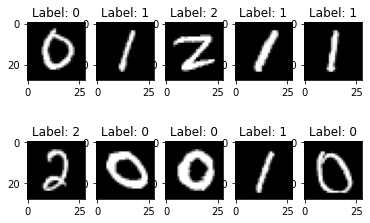

Plotting the features of 500 training images: 


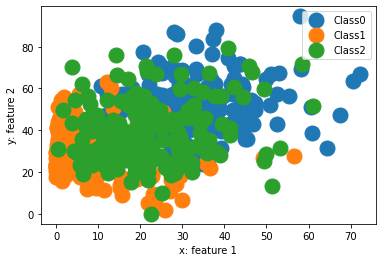

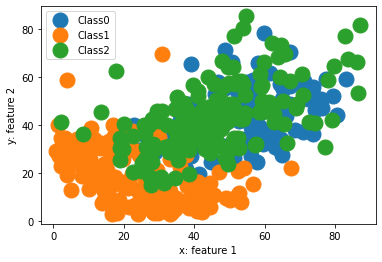

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 100)               500       
                                                                 
 dense_26 (Dense)            (None, 3)                 303       
                                                                 
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
932/932 [==============================] - 2s 1ms/step - loss: 0.8546 - accuracy: 0.6714
Epoch 2/50
932/932 [==============================] - 1s 1ms/step - loss: 0.6039 - accuracy: 0.8461
Epoch 3/50
932/932 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.8616
Epoch 4/50
932/932 [==============================] - 1s 2ms/step - loss: 0.4806 - accuracy: 0.8693
Epoch 5/50
932/932 [==============================] 

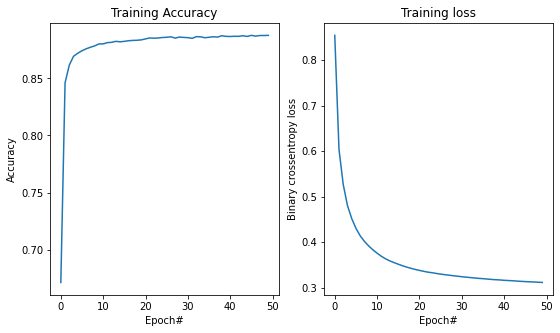

99/99 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8796
Total loss on testing set:  0.3300917148590088
Accuracy of testing set:  0.8795678615570068
The accuracy using the testing set:  0.8795678423895774
The confusion matrix using testing set: 
 [[ 901   42  174]
 [   9 1054   45]
 [  70   39  813]]


In [12]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

def img_plt(images, labels):
    plt.figure()
    for i in range(1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(images[i - 1, :, :], cmap='gray')
        plt.title('Label: ' + str(labels[i - 1]))
    plt.show()


def feat_extract(images):
    width = images.shape[1]
    height = images.shape[2]
    features = np.zeros((images.shape[0], 4))
    features_temp = np.sum(images[:, 0:int(width / 2), 0:int(height / 2)], axis=2)
    features[:, 0] = np.sum(features_temp, axis=1) / (width * height / 4)
    features_temp = np.sum(images[:, 0:int(width / 2), int(height / 2):], axis=2)
    features[:, 1] = np.sum(features_temp, axis=1) / (width * height / 4)
    features_temp = np.sum(images[:, int(width / 2):, 0:int(height / 2)], axis=2)
    features[:, 2] = np.sum(features_temp, axis=1) / (width * height / 4)
    features_temp = np.sum(images[:, int(width / 2):, int(height / 2):], axis=2)
    features[:, 3] = np.sum(features_temp, axis=1) / (width * height / 4)
    return features


def feat_plot(features, labels, classes):
    for class_i in classes:
        plt.plot(features[labels[:] == classes[class_i], 0], features[labels[:] == classes[class_i], 1], 'o',
                 markersize=15)
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class' + str(classes[class_i]) for class_i in classes])
    plt.show()


def acc_fun(labels_actual, labels_pred):
    acc = np.sum(labels_actual == labels_pred) / len(labels_actual) * 100
    return acc


def plot_curve(accuracy_train, loss_train):
    epochs = np.arange(loss_train.shape[0])
    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy_train)
    plt.xlabel('Epoch#')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss_train)
    plt.xlabel('Epoch#')
    plt.ylabel('Binary crossentropy loss')
    plt.title('Training loss')
    plt.show()


(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Selecting only 0 and 1 digits from the training and testing sets
classes = [0, 1, 2]
x_train_012 = x_train[np.logical_or.reduce((y_train == 0, y_train == 1, y_train == 2)), 0:28, 0:28]
y_train_012 = y_train[np.logical_or.reduce((y_train == 0, y_train == 1, y_train == 2))]
print('Samples of the training images')
img_plt(x_train_012[0:10, :, :], y_train_012[0:10])

x_test_012 = x_test[np.logical_or.reduce((y_test == 0, y_test == 1, y_test == 2)), 0:28, 0:28]
y_test_012 = y_test[np.logical_or.reduce((y_test == 0, y_test == 1, y_test == 2))]
print('Samples of the testing images')
img_plt(x_test_012[0:10, :, :], y_test_012[0:10])

# shuffling training data
num_train_img = x_train_012.shape[0]
train_ind = np.arange(0, num_train_img)
train_ind_s = np.random.permutation(train_ind)

# 20% of the training set
x_val_012 = x_train_012[train_ind_s[0:int(0.2*num_train_img)], :, :]
y_val_012 = y_train_012[train_ind_s[0:int(0.2*num_train_img)]]

# The rest of the training set
x_train_012 = x_train_012[train_ind_s[int(0.2*num_train_img):], :, :]
y_train_012 = y_train_012[train_ind_s[int(0.2*num_train_img):]]

# x_train_012 = x_train_012[train_ind_s, :, :]
# y_train_012 = y_train_012[train_ind_s]
# # Selecting 500 images for validation
# x_val_012 = x_train_012[0:500, :, :]
# y_val_012 = y_train_012[0:500]
# # The rest of the training set
# x_train_012 = x_train_012[500:, :, :]
# y_train_012 = y_train_012[500:]
print('Samples of the validation images')
img_plt(x_val_012[0:10, :, :], y_val_012[0:10])

# calculating the training, validation, and testing feature (average of the four quadrants grid)
feature_train = feat_extract(x_train_012)
feature_val = feat_extract(x_val_012)
feature_test = feat_extract(x_test_012)

print('Plotting the features of 500 training images: ')
feat_plot(feature_train[1:500, 0:2], y_train_012[1:500], classes)
feat_plot(feature_train[1:500, 2:4], y_train_012[1:500], classes)
# The combination between the features could be changed

# Defining the model
model_c = Sequential()
model_c.add(Dense(input_dim=4, units=100, activation='tanh'))
model_c.add(Dense(units=len(classes), activation='softmax'))
model_c.summary()

# Compile
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
model_c.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Convert class vectors to binary class matricies
from keras.utils.np_utils import to_categorical

y_train_012_c = to_categorical(y_train_012, len(classes))
y_val_012_c = to_categorical(y_val_012, len(classes))
y_test_012_c = to_categorical(y_test_012, len(classes))

# Train
history = model_c.fit(feature_train, y_train_012_c, batch_size=16, epochs=50, verbose=1)

# Evaluating the model on the training samples
score = model_c.evaluate(feature_train, y_train_012_c)
print('total loss on training set:', score[0])
print('Accuracy of training set', score[1])

# Evaluating the model on the validation samples
score = model_c.evaluate(feature_val, y_val_012_c)
print('total loss on validation set:', score[0])
print('Accuracy of validation set', score[1])

plt.figure(figsize=[9, 5])
acc_curve = np.array(history.history['accuracy'])
loss_curve = np.array(history.history['loss'])
plot_curve(acc_curve, loss_curve)

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
#Evaluating the model on the held-out samples
score=model_c.evaluate(feature_test,y_test_012_c)
print('Total loss on testing set: ', score[0])
print('Accuracy of testing set: ', score[1])

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
#predicting the class of the held-out samples
test_class1_prob=model_c.predict(feature_test)
test_lab=np.argmax(test_class1_prob,axis=1)
print('The accuracy using the testing set: ', accuracy_score(test_lab,y_test_012))
conf_mat=confusion_matrix(test_lab,y_test_012)
print('The confusion matrix using testing set: \n', conf_mat)


Problem 3 Application of Keras to build, compile, and train a neural network to 
classify songs from Spotify dataset. 

The Spotify dataset is a publicly available dataset with information about songs that did and 
didn’t make it in the weekly Hot-100 list issued by Billboard. The goal is to develop a model to 
predict if a song will make this list. The dataset contains a total of 6,398 tracks with 15 features 
extracted from the audio features of these tracks. The classes are 1 and 0 which describes 
whether that track as made it in the Hot-100 list or not respectively. 



1.   Import the data file (spotify_preprocessed.csv) to your code. The data is preprocessed 
and ready to use.

2.   Shuffle the data then split it into training (90% of the data) and test set (10% of the 
data). Split the training set further into training and validation sets with 80% and 20% 
percentages respectively. 

3. Build, compile, train, and then evaluate:

*   Build a neural network with 2 hidden layers that contain 32 nodes each and an 
output layer that has 1 unit using the Keras library. 
*   Compile the network. Select binary cross-entropy (binary_crossentropy) 
as the loss function. Use stochastic gradient descent learning (SGD, learning 
rate of 0.01). 
*  Train the network for 50 epochs and a batch size of 16. 
*  Plot the training loss and validation loss (i.e., the learning curve) for all the 
epochs.
*  Use the evaluate() Keras function to find the training and validation loss 
and accuracy. 


4. Try different design ideas with the model until you get the best training and validation 
performance. For example, changing the number of hidden layers and number of units 
in each, changing the loss function, the learning algorithm, the learning rate, number of epochs and the batch size. Repeat the scores in a table. 

5. Repeat parts (c) and (d) and select the model with the best performance. 

6. Evaluate the selected model on the test set and report the testing loss and accuracy. 


In [2]:

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


(5758, 15)
(640, 15)
(4606, 15)
(1152, 15)


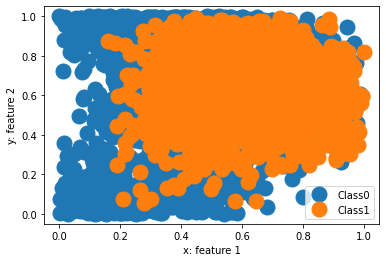

Epoch 1/50
288/288 [==============================] - 1s 2ms/step - loss: 0.2453 - accuracy: 0.6086
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.2378 - accuracy: 0.7175
Epoch 3/50
288/288 [==============================] - 1s 2ms/step - loss: 0.2239 - accuracy: 0.7410
Epoch 4/50
288/288 [==============================] - 1s 2ms/step - loss: 0.2028 - accuracy: 0.7521
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.1814 - accuracy: 0.7612
Epoch 6/50
288/288 [==============================] - 1s 2ms/step - loss: 0.1678 - accuracy: 0.7731
Epoch 7/50
288/288 [==============================] - 1s 2ms/step - loss: 0.1598 - accuracy: 0.7779
Epoch 8/50
288/288 [==============================] - 1s 2ms/step - loss: 0.1553 - accuracy: 0.7827
Epoch 9/50
288/288 [==============================] - 1s 2ms/step - loss: 0.1522 - accuracy: 0.7881
Epoch 10/50
288/288 [==============================] - 1s 2ms/step - loss: 0.1491 - accuracy: 0.7894

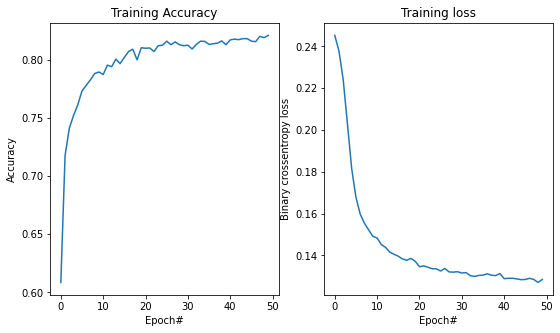

36/36 [==============================] - 0s 2ms/step - loss: 0.1252 - accuracy: 0.8325
total loss on validation set: 0.12518316507339478
Accuracy of validation set 0.8324652910232544
The accuracy using the testing set:  0.4953125
The confusion matrix using testing set: 
 [[317 323]
 [  0   0]]


In [5]:
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense
from random import randint
import tensorflow as tf
import pandas as pd
import numpy as np

def feat_plot(features, labels, classes):
    for class_i in classes:
        plt.plot(features[labels[:] == classes[class_i], 0], features[labels[:] == classes[class_i], 1], 'o',
                 markersize=15)
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class' + str(classes[class_i]) for class_i in classes])
    plt.show()

def plot_curve(accuracy_train, loss_train):
    epochs = np.arange(loss_train.shape[0])
    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy_train)
    plt.xlabel('Epoch#')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss_train)
    plt.xlabel('Epoch#')
    plt.ylabel('Binary crossentropy loss')
    plt.title('Training loss')
    plt.show()



data = pd.read_csv('/content/drive/MyDrive/spotify_preprocessed.csv')

spotify_features = np.array(data.drop(columns=['target']))
spotify_labels = np.array(data['target'])
spotify_classes = [0, 1]

# Shuffling the data
num_train_samples = spotify_features.shape[0]
spotify_train_ind = np.arange(0, num_train_samples)
spotify_train_ind_s = np.random.permutation(spotify_train_ind)

# Split 90% of the data for training
spotify_x_train = spotify_features[spotify_train_ind_s[0:int(0.9*num_train_samples)], :]
spotify_y_train = spotify_labels[spotify_train_ind_s[0:int(0.9*num_train_samples)]]
print(spotify_x_train.shape)

# The other half will be used for testing
spotify_x_test = spotify_features[spotify_train_ind_s[int(0.9*num_train_samples):], :]
spotify_y_test = spotify_labels[spotify_train_ind_s[int(0.9*num_train_samples):]]
print(spotify_x_test.shape)

# Update some variables that affect the training data
num_train_samples = spotify_x_train.shape[0]
spotify_train_ind = np.arange(0, num_train_samples)
spotify_train_ind_s = spotify_train_ind #do not randomly permute again, you will misalign the test with the validation and training data 

# Of the training data, 80% of it will be used for the actual training
spotify_x_train_f = spotify_x_train[spotify_train_ind_s[0:int(0.8*num_train_samples)], :]
spotify_y_train_f = spotify_y_train[spotify_train_ind_s[0:int(0.8*num_train_samples)]]
print(spotify_x_train_f.shape)

# The other 20% will be used for validation
spotify_x_val = spotify_x_train[spotify_train_ind_s[int(0.8*num_train_samples):]]
spotify_y_val = spotify_y_train[spotify_train_ind_s[int(0.8*num_train_samples):]]
print(spotify_x_val.shape)

# Building the Neural Network
model_s = Sequential()
model_s.add(Dense(input_dim=15, units=100, activation='relu'))
model_s.add(Dense(units=100, activation='relu'))
model_s.add(Dense(units=100, activation='relu'))
model_s.add(Dense(units=100, activation='relu'))
model_s.add(Dense(units=100, activation='relu'))
model_s.add(Dense(units=50, activation='relu'))
model_s.add(Dense(units=1, activation='sigmoid'))

# Compile
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model_s.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

feat_plot(spotify_x_train_f, spotify_y_train_f, spotify_classes)

# train
history = model_s.fit(spotify_x_train_f, spotify_y_train_f, batch_size=16, epochs=50, verbose=1)

# # Evaluating the model on the training samples
score = model_s.evaluate(spotify_x_train_f, spotify_y_train_f)
print('total loss on training set:', score[0])
print('Accuracy of training set', score[1])

plt.figure(figsize=[9, 5])
acc_curve = np.array(history.history['accuracy'])
loss_curve = np.array(history.history['loss'])
plot_curve(acc_curve, loss_curve)

# Evaluating the model on the validation samples
score = model_s.evaluate(spotify_x_val, spotify_y_val)
print('total loss on validation set:', score[0])
print('Accuracy of validation set', score[1])

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
#predicting the class of the held-out samples
test_class1_prob = model_s.predict(spotify_x_test)
test_lab = np.argmax(test_class1_prob,axis=1)
print('The accuracy using the testing set: ', accuracy_score(test_lab,spotify_y_test))
conf_mat=confusion_matrix(test_lab,spotify_y_test)
print('The confusion matrix using testing set: \n', conf_mat)




